Text(0.5, 1.0, 'Q-ty of books by rating')

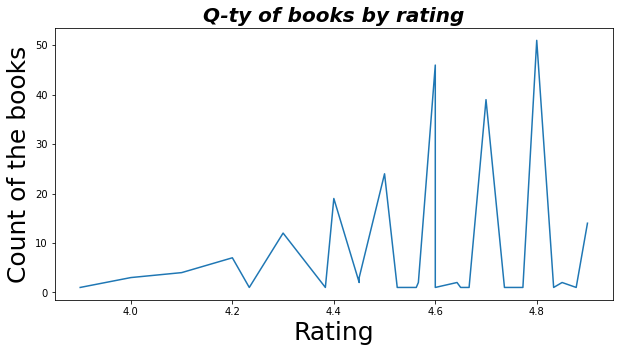

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


#Прочитайте csv файл (используйте функцию read_csv)
df = pd.read_csv('bestsellers with categories.csv')

#Выведите первый пять строчек (используется функцию head)
df.head(5)

#Выведите размеры датасета (используйте атрибут shape)
df.shape

#Ответ: О скольки книгах хранит данные датасет? 550
df.shape[0]

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

for col in df.columns:
    if df[col].isna().sum():
        print(f'{col} IS NA')  
#Ответ: Есть ли в каких либо переменных пропуски? Нет

df['genre'].unique()
#Ответ: Какие есть уникальные жанры? 'Non Fiction', 'Fiction'

#df.plot(y = 'price', kind = 'hist')
df['price'].max()
df['price'].min()
df['price'].mean()
df['price'].median()
#Ответ: Mаксимальная цена? 105
#Ответ: Минимальная цена? 0
#Ответ: Средняя цена? 13.1
#Ответ: Медианная цена? 11.0

df['user_rating'].max()
#Ответ: Какой рейтинг в датасете наивысший? Ответ: 4.9

df.groupby('user_rating').count()
#Ответ: Сколько книг имеют такой рейтинг? Ответ: 52

df[df['reviews'] == df['reviews'].max()]
#Ответ: У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing Delia Owens

sub_df = df[df['year'] == 2015]
sub_df[sub_df['price'] == sub_df['price'].max()]
#Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychological Association, 6th Edition

sub_df = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
sub_df.shape[0]
#Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 20

sub_df = df[((df['year'] == 2010) | (df['year'] == 2011))]
sub_df[sub_df['user_rating'] == 4.9]
#Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1

sub_df = df[(df['year'] == 2015) & (df['price'] < 8)]
sub_df.sort_values(by = 'price')
#Ответ: Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)

df.groupby('genre')['price'].agg(['min', 'max'])
#Ответ: Максимальная цена для жанра Fiction: Ответ 82
#Ответ: Минимальная цена для жанра Fiction: Ответ 0
#Ответ: Максимальная цена для жанра Non Fiction: Ответ 105
#Ответ: Минимальная цена для жанра Non Fiction: Ответ 0

sub_df1 = df.groupby('author')['name'].agg(['count'])
sub_df1.shape
#Ответ: Какой размерности вышла таблица? Ответ: 248x1

sub_df1[sub_df1['count'] == sub_df1['count'].max()]
#Ответ: У какого автора больше всего книг? Ответ: Jeff Kinney
#Ответ: Сколько книг у этого автора? Ответ: 12

sub_df2 = df.groupby('author')['user_rating'].agg(['mean'])
sub_df2[sub_df2['mean'] == sub_df2['mean'].min()]
#Ответ: У какого автора средний рейтинг минимальный? Ответ: Donna Tartt
#Ответ: Какой у этого автора средний рейтинг? Ответ: 3.9

sub_df = pd.concat([sub_df1, sub_df2], axis = 1)
sub_df.sort_values(by = ['count', 'mean'])
#Ответ: Какой автор первый в списке? Muriel Barbery

'''
sub = df.value_counts('genre')
plt.figure(figsize = (10, 10))
plt.pie(sub, labels = sub.index, autopct = '%.2f%%')
plt.title('Співвідношення жанрів', fontsize = 30)
'''
'''
sub = df.groupby('year')['user_rating'].agg(['mean'])
plt.figure(figsize = (10, 5))
plt.plot(sub.index, sub['mean'])
plt.xlabel('Year', fontsize = 25)
plt.ylabel('Mean rating', fontsize = 25)
plt.title('Average rating on different years', fontstyle = 'oblique', fontweight = 'bold', fontsize = '20')
'''
'''
sub_sub = sub_df['mean'].value_counts().sort_index(ascending = False)
plt.figure(figsize = (10, 5))
plt.plot(sub_sub.index, sub_sub.values)
plt.xlabel('Rating', fontsize = 25)
plt.ylabel('Count of the books', fontsize = 25)
plt.title('Q-ty of books by rating', fontstyle = 'oblique', fontweight = 'bold', fontsize = '20')
'''